SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 16 - Redes Neurais Artificiais - Perceptron

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Algoritmo-de-treinamento-do-perceptron" data-toc-modified-id="Algoritmo-de-treinamento-do-perceptron-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Algoritmo de treinamento do perceptron</a></span><ul class="toc-item"><li><span><a href="#Função-para-treinamento-do-modelo" data-toc-modified-id="Função-para-treinamento-do-modelo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Função para treinamento do modelo</a></span></li></ul></li><li><span><a href="#Treinando-o-modelo-com-funções-binárias" data-toc-modified-id="Treinando-o-modelo-com-funções-binárias-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treinando o modelo com funções binárias</a></span><ul class="toc-item"><li><span><a href="#Função-AND" data-toc-modified-id="Função-AND-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Função AND</a></span></li><li><span><a href="#Função-OR" data-toc-modified-id="Função-OR-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Função OR</a></span></li></ul></li><li><span><a href="#Função-XOR" data-toc-modified-id="Função-XOR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Função XOR</a></span></li><li><span><a href="#Treinando-o-modelo-com-o-conjunto-de-dados-Íris" data-toc-modified-id="Treinando-o-modelo-com-o-conjunto-de-dados-Íris-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Treinando o modelo com o conjunto de dados Íris</a></span></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Referencias</a></span></li></ul></div>

## Importando as bibliotecas necessárias
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, preprocessing,model_selection

%matplotlib notebook

## Algoritmo de treinamento do perceptron
---



In [2]:
def superficie_decisao(X, y, w, b, str_title):
    """
    Plota a superfície de decisão para a época atual
    """

    # Define os pontos extremos do segmento da superficie de decisão plotado.
    # p0 = (x0_min, f_x0_min)
    # p1 = (x0_max, f_x0_max)
    # ----------
    x0_min = X.min() - 1.
    x0_max = X.max() + 1.
    # ----------
    f_x0_min = -(w[0] / w[1]) * x0_min - (b / w[1])
    f_x0_max = -(w[0] / w[1]) * x0_max - (b / w[1])

    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    plt.figure()
    # Plota o conjunto de treinamento.
    for y_ in np.unique(y):
        plt.scatter(X[y==y_][:,0], X[y==y_][:,1], color=colors[y_], label=str(y_))

    plt.xlabel('x_0')
    plt.ylabel('x_1')
    plt.legend()
    plt.title(str_title)

    # Limita o espaço visualizado.
    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)

    # Plota a superfície de decisão.
    plt.plot([x0_min, x0_max], [f_x0_min, f_x0_max], color='b')

    # Mostra a figura.
    plt.show()

### Função para treinamento do modelo

In [3]:
def fit(X, y, plot=True):
    """
    Treina o modelo.
    """

    print('Inicialização')
    print('====================')
    
    # Inicialização dos pesos W
    ### w = np.random.rand(X.shape[1]) 
    w = np.array([0.1, 0.2]) 
    print(f'\nPesos: {w}')

    # Inicialização dos bias b
    ### b = np.random.rand() 
    b = 0.6 
    print(f'Bias: {b}')

    # Lista contendo os erros em cada época
    erros_epocas = []

    # Plota a superfície de decisão na tela.
    if plot:
        title_str = str('Inicialização')
        superficie_decisao(X, y, w, b, title_str)

    # Épocas de treinamento.
    # ----------------------
    for i in range(max_iter):
        print('\nÉpoca %i' % i)
        print('====================')

        # Erro total na época.
        erro_epoca = 0

        # Itera ao longo dos elementos do conjunto de dadaos
        for j in range(X.shape[0]):
            print('\nIteração %i' % j)
            print('--------------------')

            # v: combinação linear
            v = np.dot(X[j,:], w) + b
            print(f'v: {v}')

            # y^: Função de ativação degrau.
            y_out = np.where(v >= 0., 1, 0)
            print(f'y_out: {y_out}')

            # Erro
            erro = y[j] - y_out
            print(f'Erro: {erro}')

            # Erro total na época. Utiliza o erro quadrático.
            erro_epoca = erro_epoca + erro**2

            # Atualização dos pesos W
            w = w +  learning_rate * np.dot(erro, X[j,:])
            print(f'Pesos: {w}')

            # Atualização dos bias, b
            b = b +  learning_rate * erro.sum()
            print(f'Bias: {b}')

        # Erro total da época.
        erro_epoca = erro_epoca / 2.
        print('--------------------')
        print(f'\nErro da época: {erro_epoca}')

        # Adiciona o erro da época à lista de erros.
        erros_epocas.append(erro_epoca)

        # Plota a superfície de decisão
        if plot:
            title_str = str('Época %d' % i)
            superficie_decisao(X, y, w, b, title_str)

        # Interromper o treinamento se erro da época for menor do que um limiar pré-determinado.
        if np.abs(erro_epoca) <= 0.01:
            break

## Treinando o modelo com funções binárias
---

In [4]:
# Dados
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])


# Funções binárias
# ================
# AND
y_and = np.array([0, 0, 0, 1])

# OR
y_or = np.array([0, 1, 1, 1])

# XOR
y_xor = np.array([0, 1, 1, 0])

### Função AND

Inicialização

Pesos: [0.1 0.2]
Bias: 0.6


<IPython.core.display.Javascript object>


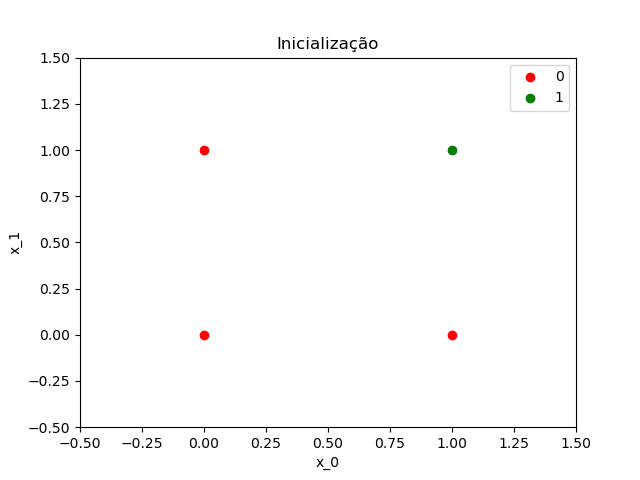


Época 0

Iteração 0
--------------------
v: 0.6
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 0.5

Iteração 1
--------------------
v: 0.7
y_out: 1
Erro: -1
Pesos: [0.1 0.1]
Bias: 0.4

Iteração 2
--------------------
v: 0.5
y_out: 1
Erro: -1
Pesos: [0.  0.1]
Bias: 0.30000000000000004

Iteração 3
--------------------
v: 0.4
y_out: 1
Erro: 0
Pesos: [0.  0.1]
Bias: 0.30000000000000004
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


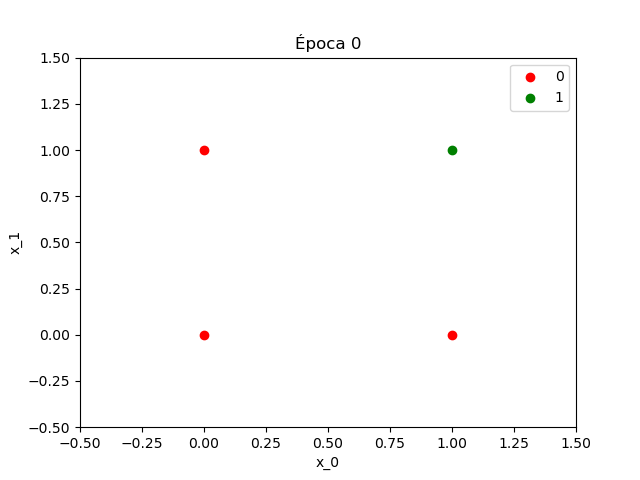


Época 1

Iteração 0
--------------------
v: 0.30000000000000004
y_out: 1
Erro: -1
Pesos: [0.  0.1]
Bias: 0.20000000000000004

Iteração 1
--------------------
v: 0.30000000000000004
y_out: 1
Erro: -1
Pesos: [0. 0.]
Bias: 0.10000000000000003

Iteração 2
--------------------
v: 0.10000000000000003
y_out: 1
Erro: -1
Pesos: [-0.1  0. ]
Bias: 2.7755575615628914e-17

Iteração 3
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 1
Pesos: [0.  0.1]
Bias: 0.10000000000000003
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


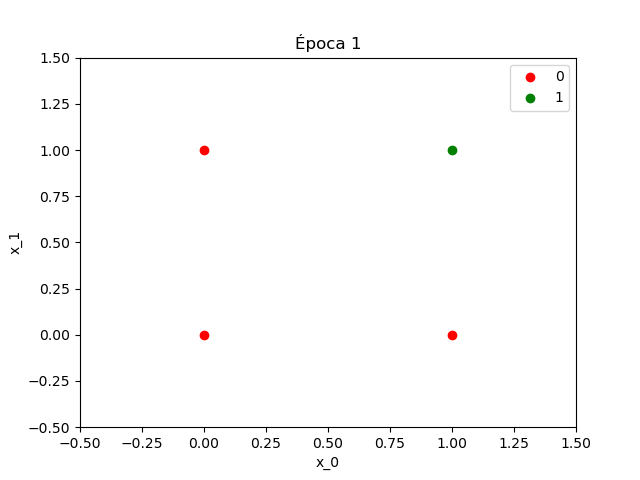


Época 2

Iteração 0
--------------------
v: 0.10000000000000003
y_out: 1
Erro: -1
Pesos: [0.  0.1]
Bias: 2.7755575615628914e-17

Iteração 1
--------------------
v: 0.10000000000000003
y_out: 1
Erro: -1
Pesos: [0. 0.]
Bias: -0.09999999999999998

Iteração 2
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 0
Pesos: [0. 0.]
Bias: -0.09999999999999998

Iteração 3
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 1
Pesos: [0.1 0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


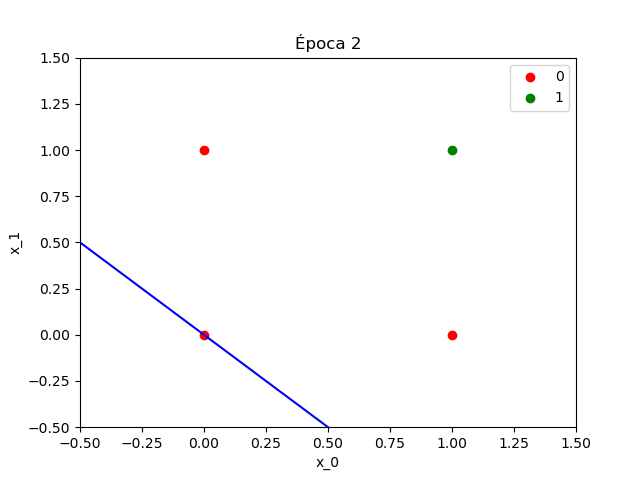


Época 3

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [0.1 0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [0.1 0. ]
Bias: -0.19999999999999998

Iteração 2
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 0
Pesos: [0.1 0. ]
Bias: -0.19999999999999998

Iteração 3
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 1
Pesos: [0.2 0.1]
Bias: -0.09999999999999998
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


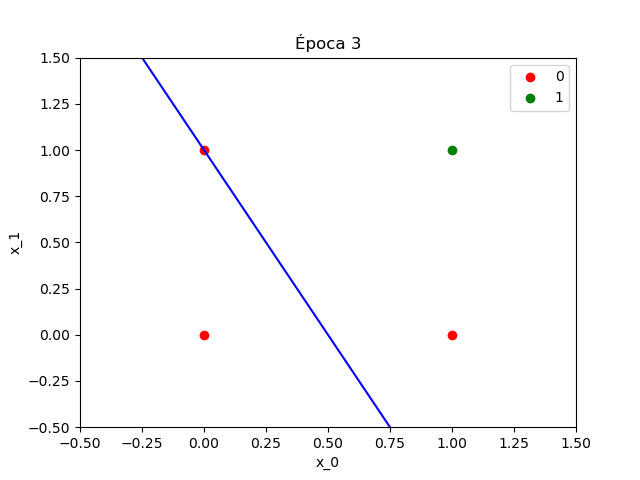


Época 4

Iteração 0
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [0.2 0. ]
Bias: -0.19999999999999998

Iteração 2
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [0.1 0. ]
Bias: -0.3

Iteração 3
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [0.2 0.1]
Bias: -0.19999999999999998
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


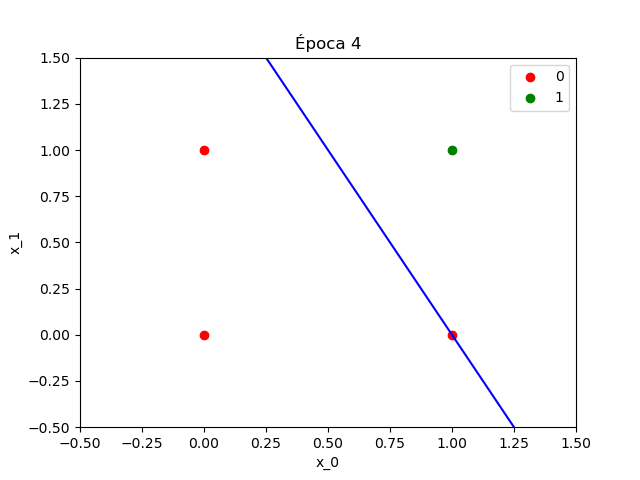


Época 5

Iteração 0
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.19999999999999998

Iteração 1
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.19999999999999998

Iteração 2
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [0.1 0.1]
Bias: -0.3

Iteração 3
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 1
Pesos: [0.2 0.2]
Bias: -0.19999999999999998
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


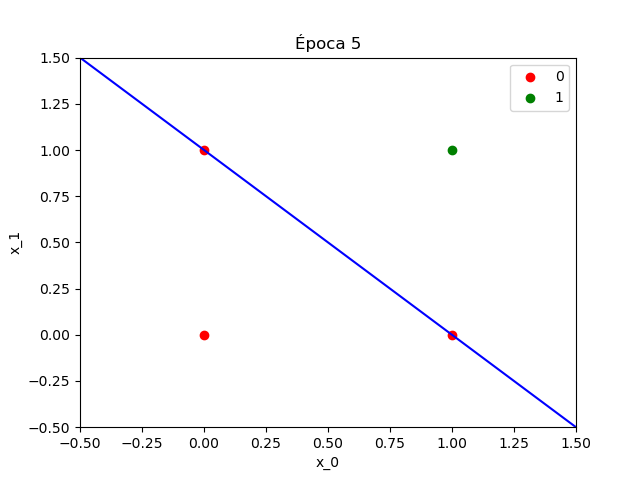


Época 6

Iteração 0
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 0
Pesos: [0.2 0.2]
Bias: -0.19999999999999998

Iteração 1
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [0.2 0.1]
Bias: -0.3

Iteração 2
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.3

Iteração 3
--------------------
v: 5.551115123125783e-17
y_out: 1
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.3
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


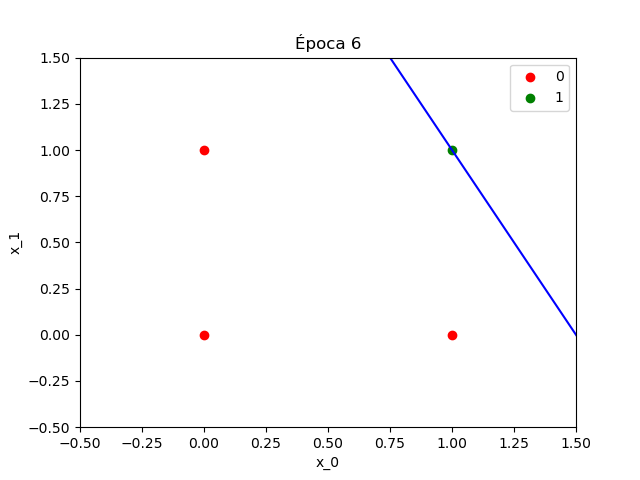


Época 7

Iteração 0
--------------------
v: -0.3
y_out: 0
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.3

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.3

Iteração 2
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.3

Iteração 3
--------------------
v: 5.551115123125783e-17
y_out: 1
Erro: 0
Pesos: [0.2 0.1]
Bias: -0.3
--------------------

Erro da época: 0.0


<IPython.core.display.Javascript object>


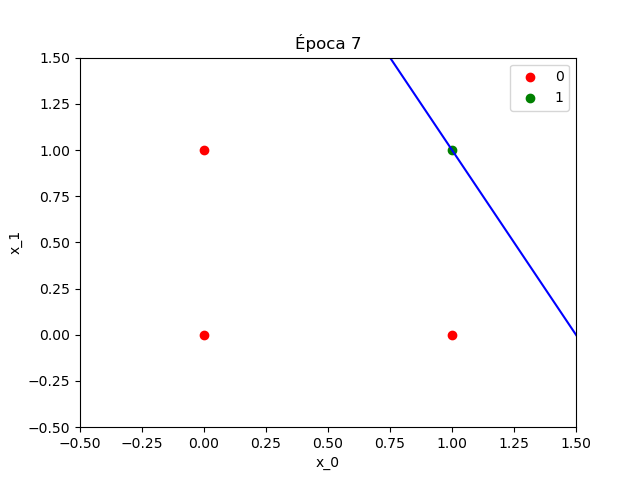

In [5]:
# Número máximo de iterações.
max_iter = 20

# Taxa de aprendizado.
learning_rate = 0.1

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y_and)

### Função OR

Inicialização

Pesos: [0.1 0.2]
Bias: 0.6


<IPython.core.display.Javascript object>


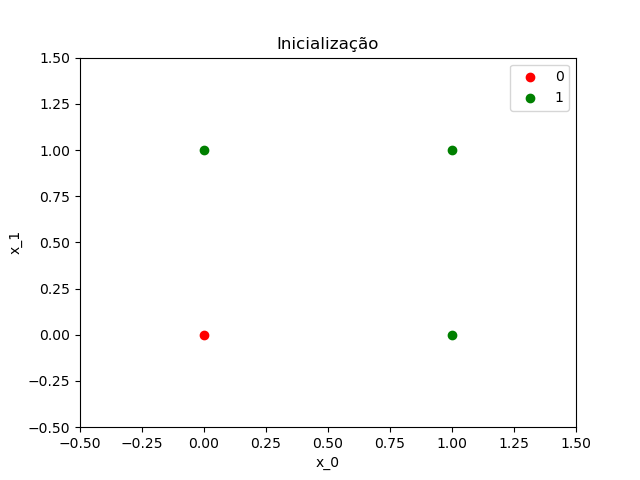


Época 0

Iteração 0
--------------------
v: 0.6
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 0.5

Iteração 1
--------------------
v: 0.7
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.5

Iteração 2
--------------------
v: 0.6
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.5

Iteração 3
--------------------
v: 0.8
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.5
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


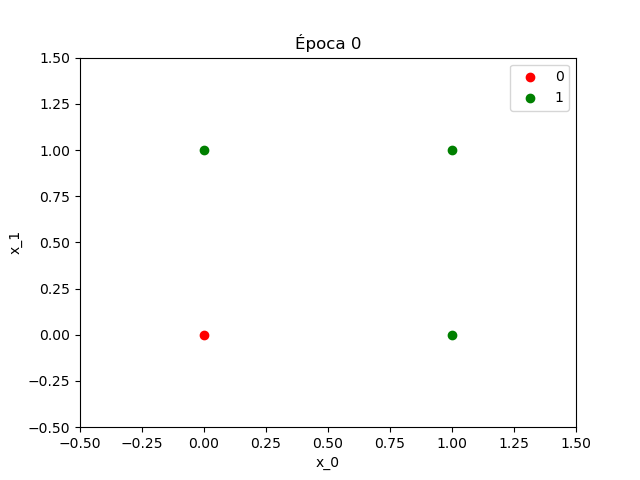


Época 1

Iteração 0
--------------------
v: 0.5
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 0.4

Iteração 1
--------------------
v: 0.6000000000000001
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.4

Iteração 2
--------------------
v: 0.5
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.4

Iteração 3
--------------------
v: 0.7000000000000001
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.4
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


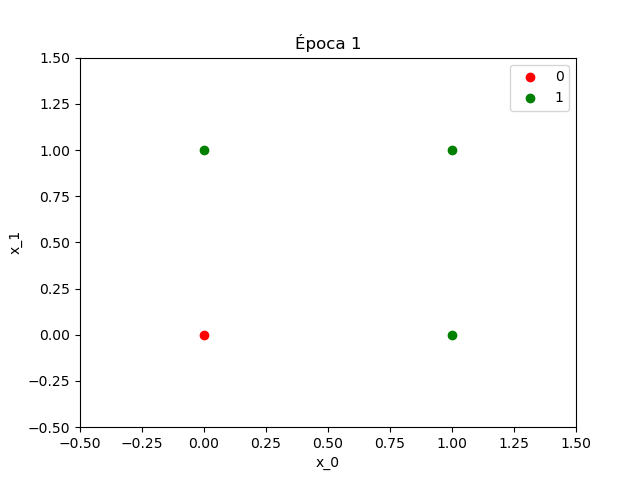


Época 2

Iteração 0
--------------------
v: 0.4
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 0.30000000000000004

Iteração 1
--------------------
v: 0.5
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.30000000000000004

Iteração 2
--------------------
v: 0.4
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.30000000000000004

Iteração 3
--------------------
v: 0.6000000000000001
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.30000000000000004
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


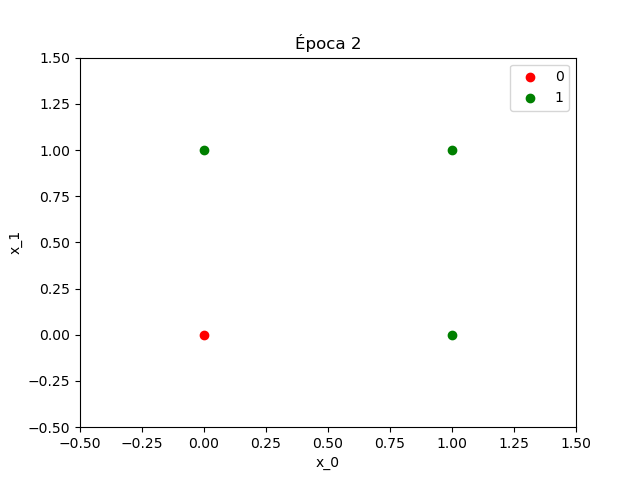


Época 3

Iteração 0
--------------------
v: 0.30000000000000004
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 0.20000000000000004

Iteração 1
--------------------
v: 0.4
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.20000000000000004

Iteração 2
--------------------
v: 0.30000000000000004
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.20000000000000004

Iteração 3
--------------------
v: 0.5000000000000001
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.20000000000000004
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


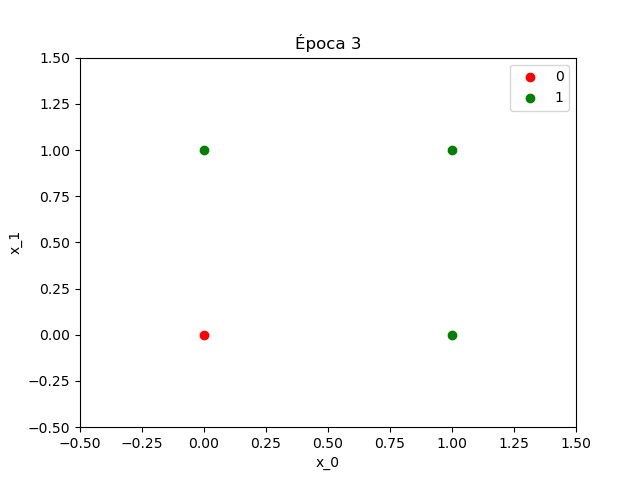


Época 4

Iteração 0
--------------------
v: 0.20000000000000004
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 0.10000000000000003

Iteração 1
--------------------
v: 0.30000000000000004
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.10000000000000003

Iteração 2
--------------------
v: 0.20000000000000004
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 0.4000000000000001
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.10000000000000003
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


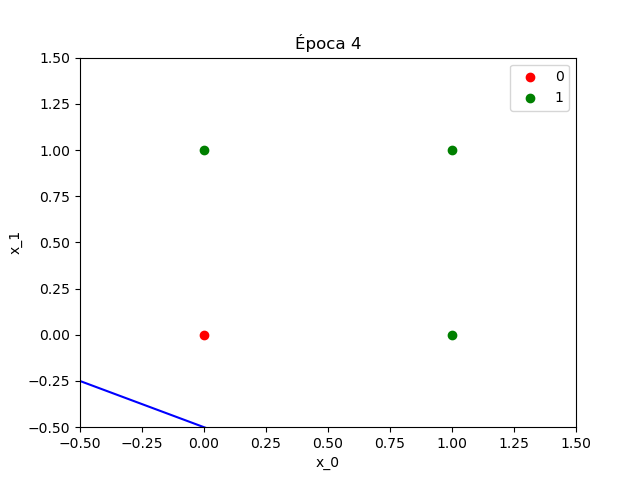


Época 5

Iteração 0
--------------------
v: 0.10000000000000003
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 2.7755575615628914e-17

Iteração 1
--------------------
v: 0.20000000000000004
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: 0.10000000000000003
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 2.7755575615628914e-17

Iteração 3
--------------------
v: 0.30000000000000004
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


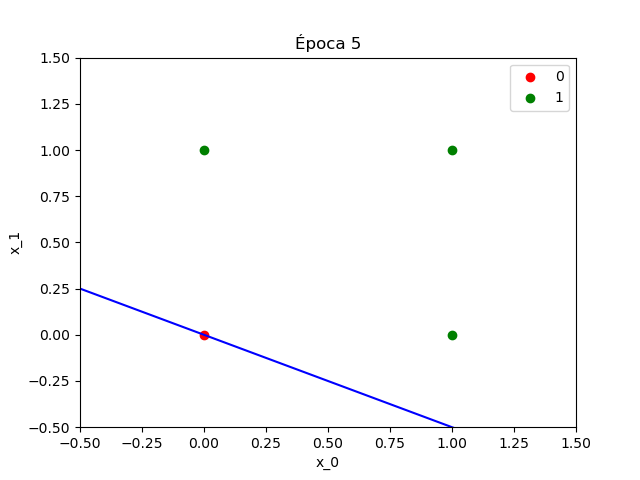


Época 6

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: 0.10000000000000003
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: -0.09999999999999998

Iteração 2
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: -0.09999999999999998

Iteração 3
--------------------
v: 0.20000000000000007
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: -0.09999999999999998
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


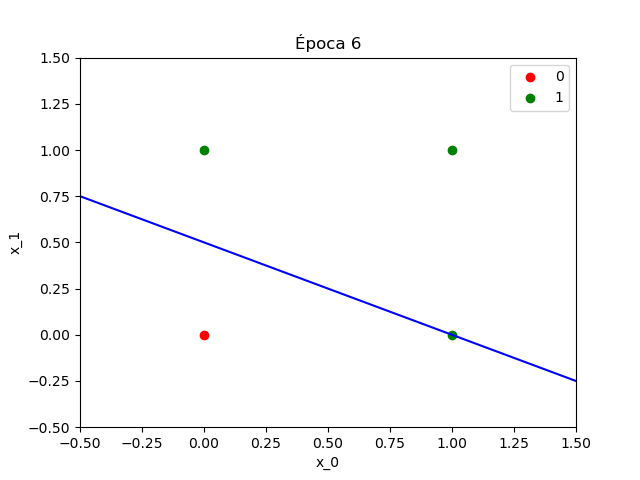


Época 7

Iteração 0
--------------------
v: -0.09999999999999998
y_out: 0
Erro: 0
Pesos: [0.1 0.2]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: 0.10000000000000003
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: -0.09999999999999998

Iteração 2
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: -0.09999999999999998

Iteração 3
--------------------
v: 0.20000000000000007
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: -0.09999999999999998
--------------------

Erro da época: 0.0


<IPython.core.display.Javascript object>


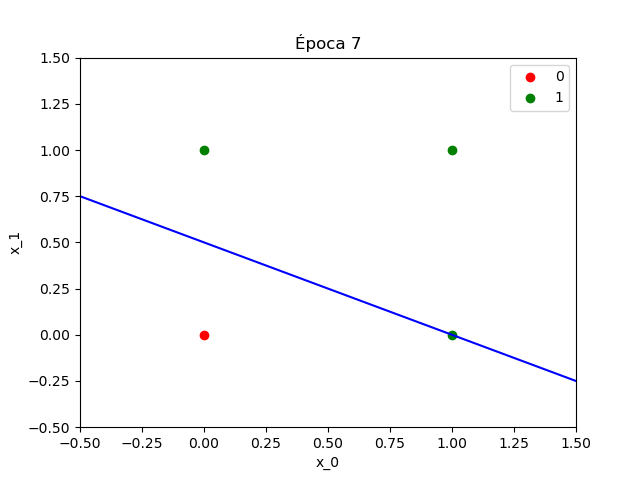

In [6]:
# Número máximo de iterações.
max_iter = 10

# Taxa de aprendizado.
learning_rate = 0.1

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y_or)

## Função XOR

A função XOR é não linear, dessa forma, o algoritmo do perceptron não converge.

Inicialização

Pesos: [0.1 0.2]
Bias: 0.6


<IPython.core.display.Javascript object>


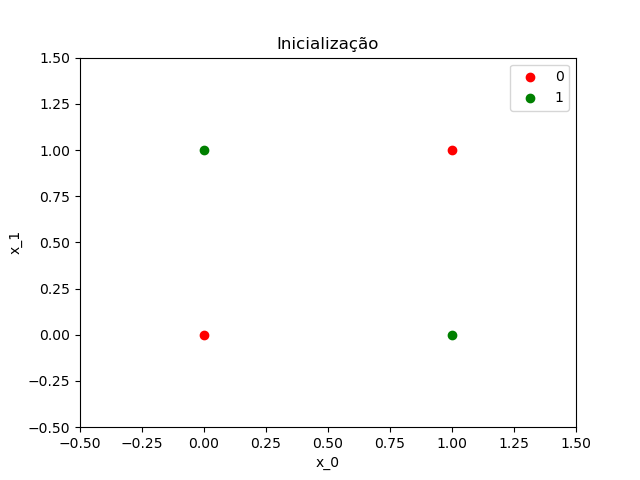


Época 0

Iteração 0
--------------------
v: 0.6
y_out: 1
Erro: -1
Pesos: [0.1 0.2]
Bias: 0.5

Iteração 1
--------------------
v: 0.7
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.5

Iteração 2
--------------------
v: 0.6
y_out: 1
Erro: 0
Pesos: [0.1 0.2]
Bias: 0.5

Iteração 3
--------------------
v: 0.8
y_out: 1
Erro: -1
Pesos: [0.  0.1]
Bias: 0.4
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


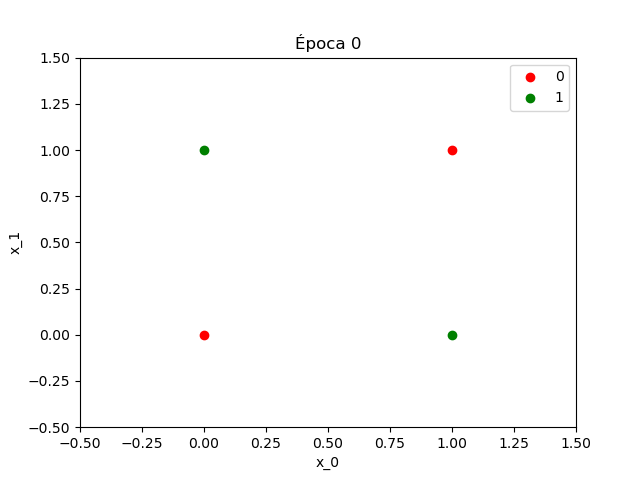


Época 1

Iteração 0
--------------------
v: 0.4
y_out: 1
Erro: -1
Pesos: [0.  0.1]
Bias: 0.30000000000000004

Iteração 1
--------------------
v: 0.4
y_out: 1
Erro: 0
Pesos: [0.  0.1]
Bias: 0.30000000000000004

Iteração 2
--------------------
v: 0.30000000000000004
y_out: 1
Erro: 0
Pesos: [0.  0.1]
Bias: 0.30000000000000004

Iteração 3
--------------------
v: 0.4
y_out: 1
Erro: -1
Pesos: [-0.1  0. ]
Bias: 0.20000000000000004
--------------------

Erro da época: 1.0


<ipython-input-2-52c989da61ef>:13: RuntimeWarning: divide by zero encountered in double_scalars
  f_x0_min = -(w[0] / w[1]) * x0_min - (b / w[1])
<ipython-input-2-52c989da61ef>:14: RuntimeWarning: divide by zero encountered in double_scalars
  f_x0_max = -(w[0] / w[1]) * x0_max - (b / w[1])
<ipython-input-2-52c989da61ef>:14: RuntimeWarning: invalid value encountered in double_scalars
  f_x0_max = -(w[0] / w[1]) * x0_max - (b / w[1])
<ipython-input-2-52c989da61ef>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


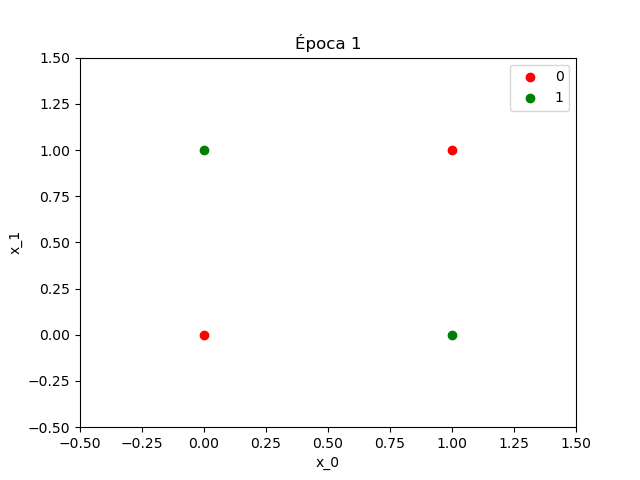


Época 2

Iteração 0
--------------------
v: 0.20000000000000004
y_out: 1
Erro: -1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 1
--------------------
v: 0.10000000000000003
y_out: 1
Erro: 0
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 2
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: 0
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


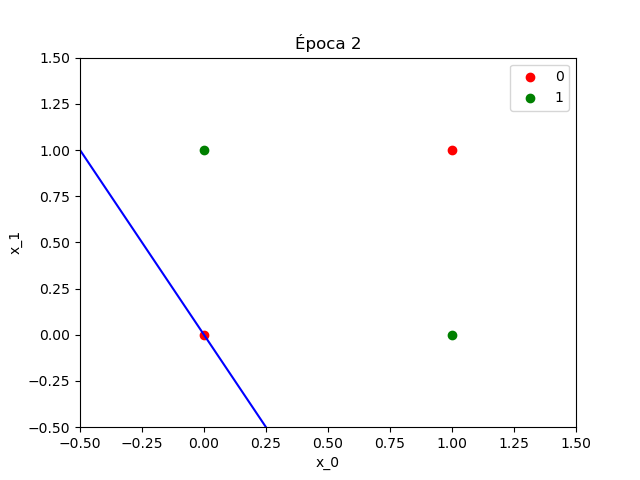


Época 3

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.2  0. ]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


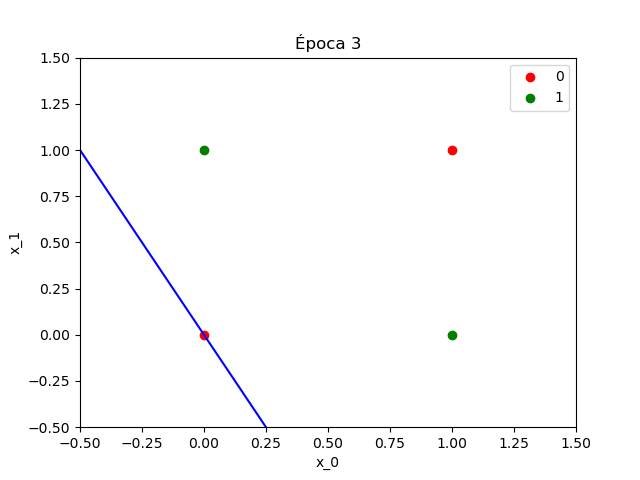


Época 4

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.2  0. ]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


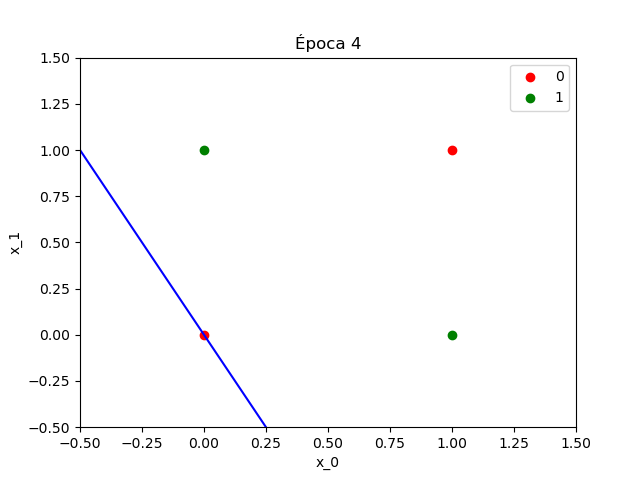


Época 5

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.2  0. ]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


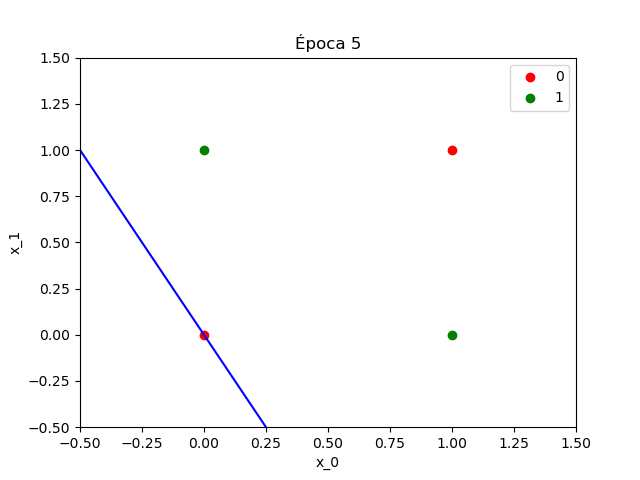


Época 6

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.2  0. ]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


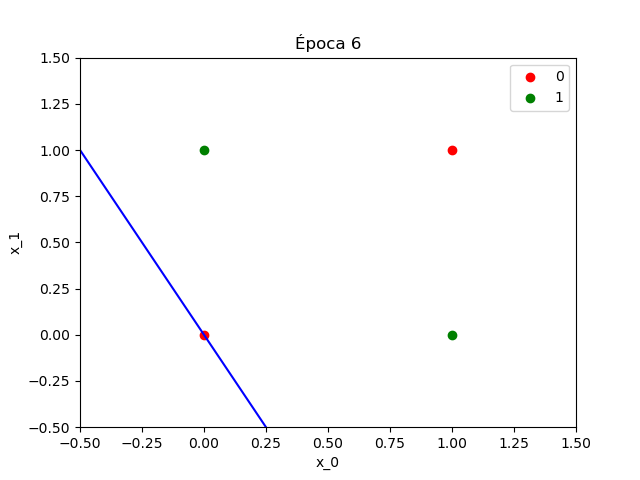


Época 7

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.2  0. ]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


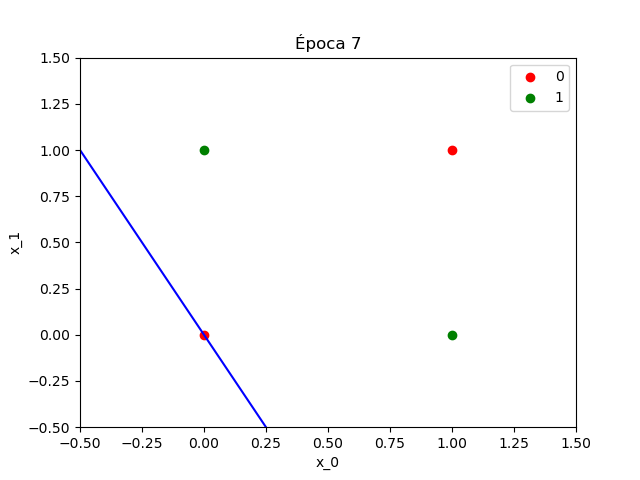


Época 8

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.2  0. ]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


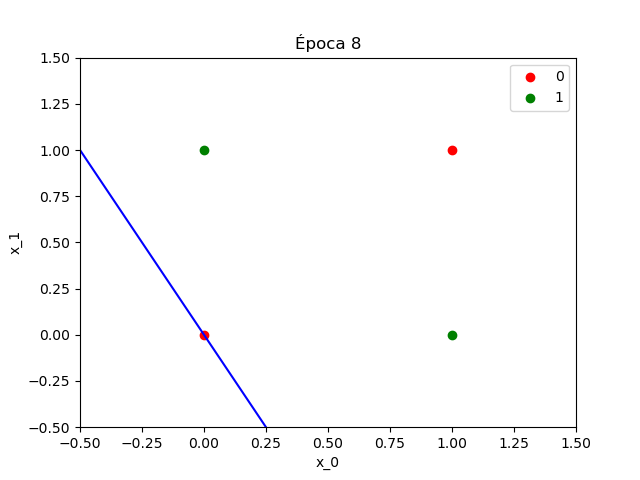


Época 9

Iteração 0
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: -0.09999999999999998

Iteração 1
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.2  0. ]
Bias: 2.7755575615628914e-17

Iteração 2
--------------------
v: -0.19999999999999998
y_out: 0
Erro: 1
Pesos: [-0.1  0. ]
Bias: 0.10000000000000003

Iteração 3
--------------------
v: 2.7755575615628914e-17
y_out: 1
Erro: -1
Pesos: [-0.2 -0.1]
Bias: 2.7755575615628914e-17
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


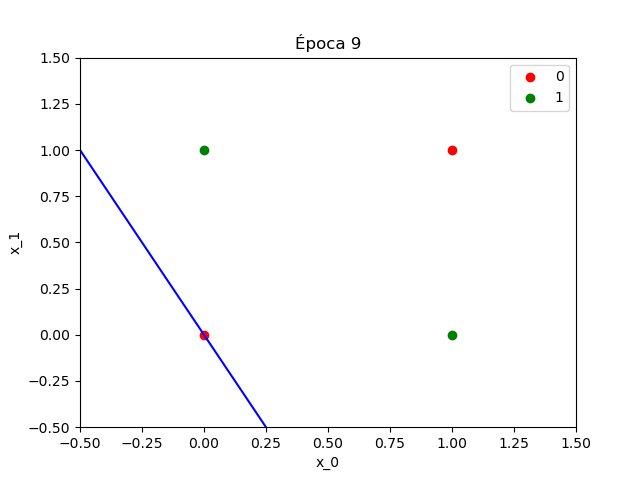

In [7]:
# Número máximo de iterações.
max_iter = 10

# Taxa de aprendizado.
learning_rate = 0.1

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y_xor)

## Treinando o modelo com o conjunto de dados Íris
---

In [8]:
# Carrega o conjunto de dados IRIS
# ============================================            
iris = datasets.load_iris()

# Todas as três classes:
# Apenas 2 atributos: comprimento da sépala (0) e largura da sépala (1)
# ----------------------
## X = iris.data[:, :2]
## y = iris.target

# Seleciona apenas as classes Setosa (0) e Virginica (1).
# Apenas 2 atributos: comprimento da sépala (0) e largura da sépala (1)
# -------------------------------------------------------
X = iris.data[iris.target < 2, :2]
y = iris.target[iris.target < 2]

# Divide conjunto de treino (70 %) e testes (30 %)
X, X_test, y, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

# Normaliza os dados.
# -------------------
X = preprocessing.scale(X)
print('Média e desvio padrão:')
print(X.mean(axis=0), X.std(axis=0))

Média e desvio padrão:
[1.77001271e-15 9.01659699e-16] [1. 1.]


Inicialização

Pesos: [0.1 0.2]
Bias: 0.6


<IPython.core.display.Javascript object>


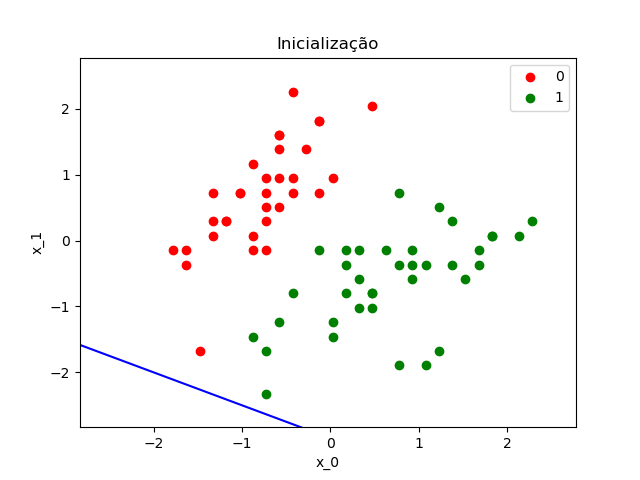


Época 0

Iteração 0
--------------------
v: 0.642690908287215
y_out: 1
Erro: -1
Pesos: [0.11028056 0.19272518]
Bias: 0.59

Iteração 1
--------------------
v: 0.49945016495154315
y_out: 1
Erro: -1
Pesos: [0.12356587 0.18982149]
Bias: 0.58

Iteração 2
--------------------
v: 0.8138303268142313
y_out: 1
Erro: 0
Pesos: [0.12356587 0.18982149]
Bias: 0.58

Iteração 3
--------------------
v: 0.6653162430128462
y_out: 1
Erro: -1
Pesos: [0.12783691 0.18254667]
Bias: 0.57

Iteração 4
--------------------
v: 0.1709226617015635
y_out: 1
Erro: 0
Pesos: [0.12783691 0.18254667]
Bias: 0.57

Iteração 5
--------------------
v: 0.8860958145723559
y_out: 1
Erro: -1
Pesos: [0.1291032 0.164344 ]
Bias: 0.5599999999999999

Iteração 6
--------------------
v: 0.5583274279711281
y_out: 1
Erro: 0
Pesos: [0.1291032 0.164344 ]
Bias: 0.5599999999999999

Iteração 7
--------------------
v: 0.8076038979839305
y_out: 1
Erro: 0
Pesos: [0.1291032 0.164344 ]
Bias: 0.5599999999999999

Iteração 8
--------------------
v: 0.5

<IPython.core.display.Javascript object>


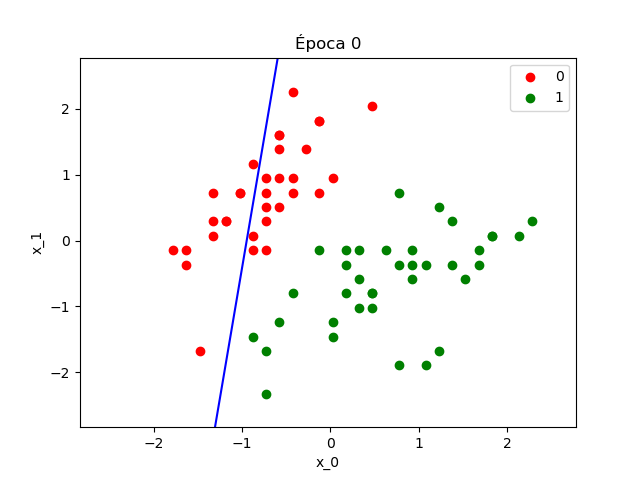


Época 1

Iteração 0
--------------------
v: -0.05483118982696211
y_out: 0
Erro: 0
Pesos: [ 0.31677164 -0.0401004 ]
Bias: 0.2999999999999997

Iteração 1
--------------------
v: -0.1324848816616157
y_out: 0
Erro: 0
Pesos: [ 0.31677164 -0.0401004 ]
Bias: 0.2999999999999997

Iteração 2
--------------------
v: 0.5162615919700799
y_out: 1
Erro: 0
Pesos: [ 0.31677164 -0.0401004 ]
Bias: 0.2999999999999997

Iteração 3
--------------------
v: 0.135533070772052
y_out: 1
Erro: -1
Pesos: [ 0.32104269 -0.04737522]
Bias: 0.2899999999999997

Iteração 4
--------------------
v: 0.13584711269854027
y_out: 1
Erro: 0
Pesos: [ 0.32104269 -0.04737522]
Bias: 0.2899999999999997

Iteração 5
--------------------
v: 0.16311114595938989
y_out: 1
Erro: -1
Pesos: [ 0.32230898 -0.06557789]
Bias: 0.2799999999999997

Iteração 6
--------------------
v: 0.3456555590057212
y_out: 1
Erro: 0
Pesos: [ 0.32230898 -0.06557789]
Bias: 0.2799999999999997

Iteração 7
--------------------
v: 0.8639758592946413
y_out: 1
Erro: 0
Pes

<IPython.core.display.Javascript object>


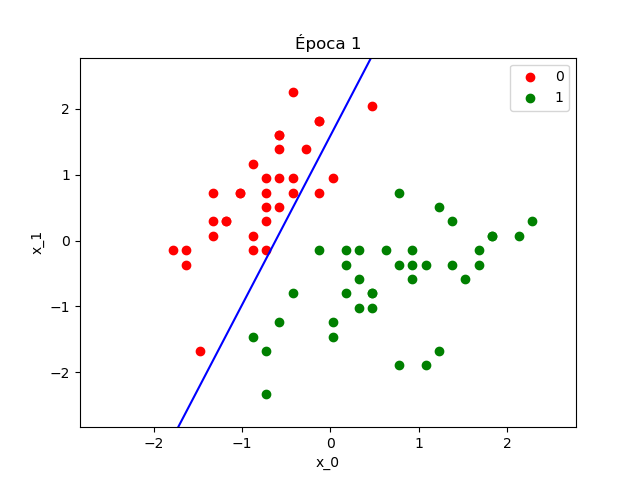


Época 2

Iteração 0
--------------------
v: -0.23406953829838978
y_out: 0
Erro: 0
Pesos: [ 0.33868489 -0.13180064]
Bias: 0.20999999999999963

Iteração 1
--------------------
v: -0.2782241801422545
y_out: 0
Erro: 0
Pesos: [ 0.33868489 -0.13180064]
Bias: 0.20999999999999963

Iteração 2
--------------------
v: 0.3765296210672987
y_out: 1
Erro: 0
Pesos: [ 0.33868489 -0.13180064]
Bias: 0.20999999999999963

Iteração 3
--------------------
v: -0.03053648517649349
y_out: 0
Erro: 0
Pesos: [ 0.33868489 -0.13180064]
Bias: 0.20999999999999963

Iteração 4
--------------------
v: 0.18456235420651762
y_out: 1
Erro: 0
Pesos: [ 0.33868489 -0.13180064]
Bias: 0.20999999999999963

Iteração 5
--------------------
v: -0.07279967040825408
y_out: 0
Erro: 0
Pesos: [ 0.33868489 -0.13180064]
Bias: 0.20999999999999963

Iteração 6
--------------------
v: 0.2882203373795693
y_out: 1
Erro: 0
Pesos: [ 0.33868489 -0.13180064]
Bias: 0.20999999999999963

Iteração 7
--------------------
v: 0.8191302911062422
y_out: 1
Er

<IPython.core.display.Javascript object>


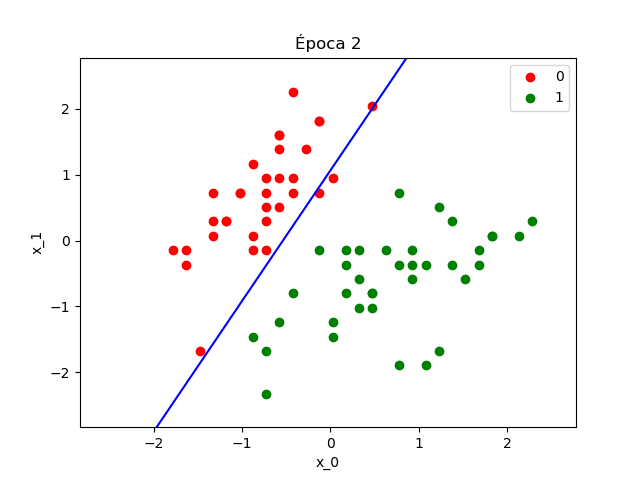


Época 3

Iteração 0
--------------------
v: -0.28725900626678824
y_out: 0
Erro: 0
Pesos: [ 0.33497187 -0.16892409]
Bias: 0.1799999999999996

Iteração 1
--------------------
v: -0.31407080008527116
y_out: 0
Erro: 0
Pesos: [ 0.33497187 -0.16892409]
Bias: 0.1799999999999996

Iteração 2
--------------------
v: 0.3166461243825671
y_out: 1
Erro: 0
Pesos: [ 0.33497187 -0.16892409]
Bias: 0.1799999999999996

Iteração 3
--------------------
v: -0.08595729605033631
y_out: 0
Erro: 0
Pesos: [ 0.33497187 -0.16892409]
Bias: 0.1799999999999996

Iteração 4
--------------------
v: 0.21950668593502515
y_out: 1
Erro: 0
Pesos: [ 0.33497187 -0.16892409]
Bias: 0.1799999999999996

Iteração 5
--------------------
v: -0.1699040941664683
y_out: 0
Erro: 0
Pesos: [ 0.33497187 -0.16892409]
Bias: 0.1799999999999996

Iteração 6
--------------------
v: 0.2630225367456015
y_out: 1
Erro: 0
Pesos: [ 0.33497187 -0.16892409]
Bias: 0.1799999999999996

Iteração 7
--------------------
v: 0.7796827091959726
y_out: 1
Erro: 0
P

<IPython.core.display.Javascript object>


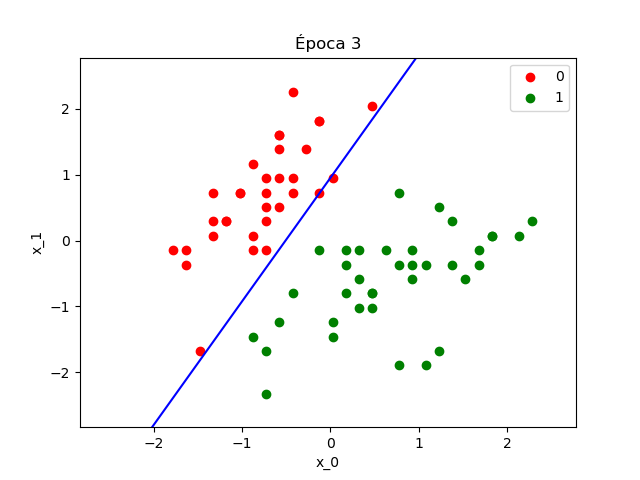


Época 4

Iteração 0
--------------------
v: -0.3038985633983965
y_out: 0
Erro: 0
Pesos: [ 0.33473579 -0.17838449]
Bias: 0.1699999999999996

Iteração 1
--------------------
v: -0.3265041498551172
y_out: 0
Erro: 0
Pesos: [ 0.33473579 -0.17838449]
Bias: 0.1699999999999996

Iteração 2
--------------------
v: 0.29958093536726127
y_out: 1
Erro: 0
Pesos: [ 0.33473579 -0.17838449]
Bias: 0.1699999999999996

Iteração 3
--------------------
v: -0.1027387304765105
y_out: 0
Erro: 0
Pesos: [ 0.33473579 -0.17838449]
Bias: 0.1699999999999996

Iteração 4
--------------------
v: 0.2255401680857701
y_out: 1
Erro: 0
Pesos: [ 0.33473579 -0.17838449]
Bias: 0.1699999999999996

Iteração 5
--------------------
v: -0.19709463902612356
y_out: 0
Erro: 0
Pesos: [ 0.33473579 -0.17838449]
Bias: 0.1699999999999996

Iteração 6
--------------------
v: 0.2543697624538201
y_out: 1
Erro: 0
Pesos: [ 0.33473579 -0.17838449]
Bias: 0.1699999999999996

Iteração 7
--------------------
v: 0.7685721379868954
y_out: 1
Erro: 0
Pes

v: 0.5104451634131024
y_out: 1
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 69
--------------------
v: 0.5656433006979773
y_out: 1
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


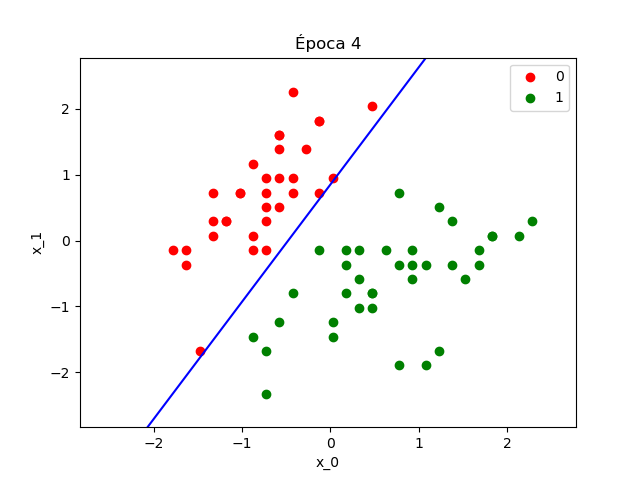


Época 5

Iteração 0
--------------------
v: -0.32053812053000474
y_out: 0
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 1
--------------------
v: -0.3389374996249633
y_out: 0
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 2
--------------------
v: 0.28251574635195553
y_out: 1
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 3
--------------------
v: -0.11952016490268458
y_out: 0
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 4
--------------------
v: 0.23157365023651505
y_out: 1
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 5
--------------------
v: -0.22428518388577884
y_out: 0
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 6
--------------------
v: 0.24571698816203874
y_out: 1
Erro: 0
Pesos: [ 0.3344997  -0.18784488]
Bias: 0.1599999999999996

Iteração 7
--------------------
v: 0.7574615667778183
y_out: 1
Erro: 0

<IPython.core.display.Javascript object>


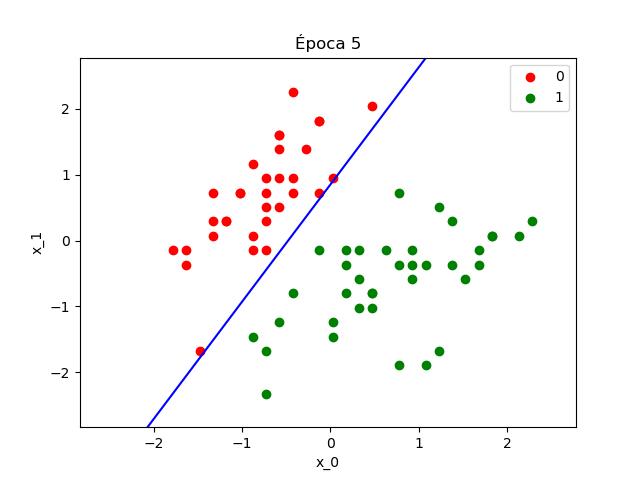

In [9]:
# Define hiperparâmetros e configurações iniciais
# -----------------------------------------------
# Número máximo de iterações.
max_iter = 40

# Taxa de aprendizado.
learning_rate = 0.01

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y)

## Referencias
---

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.